In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD

In [2]:
classes = [u'\u0966', u'\u0967', u'\u0968', u'\u0969', u'\u096A', u'\u096B', u'\u096C', u'\u096D', u'\u096E', u'\u096F', u'\u0905', u'\u0906',
           u'\u0907', u'\u0908', u'\u0909', u'\u090A', u'\u090F', u'\u0910', u'\u0913', u'\u0914', u'\u0905'+u'\u0902', u'\u0905'+u'\u0903', u'\u0915', 
           u'\u0916', u'\u0917', u'\u0918', u'\u0919', u'\u091A', u'\u091B', u'\u091C', u'\u091D', u'\u091E', u'\u091F', u'\u0920', u'\u0921', 
           u'\u0922', u'\u0923', u'\u0924', u'\u0925', u'\u0926', u'\u0927', u'\u0928', u'\u092A', u'\u092B', u'\u092C', u'\u092D', 
           u'\u092E', u'\u092F', u'\u0930', u'\u0932', u'\u0935', u'\u0936', u'\u0937', u'\u0938', u'\u0939', 'क्ष', u'\u0924'+u'\u094D'+u'\u0930', 
           'ज्ञ' ]
print(classes[:])

['०', '१', '२', '३', '४', '५', '६', '७', '८', '९', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'क्ष', 'त्र', 'ज्ञ']


In [47]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = './dataset/train/',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 128,
    image_size = (32,32)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = './dataset/test/',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 128,
    image_size = (32,32)
)

Found 104755 files belonging to 58 classes.
Found 27997 files belonging to 58 classes.


In [48]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(58, activation='softmax'))

In [43]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(58, activation='softmax'))

In [67]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(58, activation='softmax'))
#opt = SGD(learning_rate=0.001, momentum=0.9)

In [68]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        51264     
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 64)          102464    
                                                      

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
819/819 [==============================] - 142s 171ms/step - loss: 0.9726 - accuracy: 0.7271 - val_loss: 0.3851 - val_accuracy: 0.8815
Epoch 2/20
819/819 [==============================] - 133s 162ms/step - loss: 0.2054 - accuracy: 0.9319 - val_loss: 0.2608 - val_accuracy: 0.9217
Epoch 3/20
819/819 [==============================] - 133s 162ms/step - loss: 0.1180 - accuracy: 0.9609 - val_loss: 0.2413 - val_accuracy: 0.9312
Epoch 4/20
819/819 [==============================] - 135s 165ms/step - loss: 0.0886 - accuracy: 0.9706 - val_loss: 0.2504 - val_accuracy: 0.9306
Epoch 5/20
819/819 [==============================] - 133s 162ms/step - loss: 0.0668 - accuracy: 0.9779 - val_loss: 0.2471 - val_accuracy: 0.9354
Epoch 6/20
819/819 [==============================] - 133s 162ms/step - loss: 0.0600 - accuracy: 0.9800 - val_loss: 0.2641 - val_accuracy: 0.9333
Epoch 7/20
819/819 [==============================] - 133s 163ms/step - loss: 0.0531 - accuracy: 0.9821 - val_loss: 0.2526 -

In [53]:
import cv2
import matplotlib.pyplot as plt

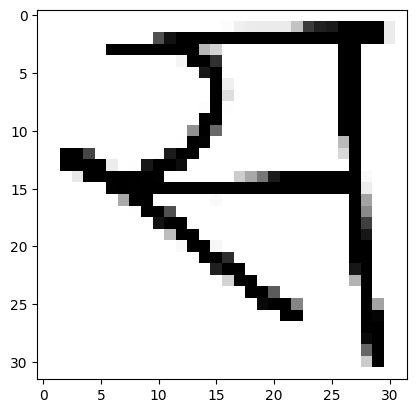

In [147]:
test_img = cv2.imread('./temp/ROI_0.png')
test_img  = cv2.resize(test_img, (32,32))
plt.imshow(test_img)

In [148]:
test_input = test_img.reshape((1,32,32,3))

In [149]:
prob = model.predict(test_input)
prob

1/1 [==============================] - 0s 38ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [150]:
pred = prob.argmax(axis=-1)
pred

array([53], dtype=int64)

In [151]:
print('Predicted as: ', classes[pred[0]])

Predicted as:  स


In [71]:
#For testing words segmented by the other script
import os
import numpy as np

In [143]:
images = [img for img in os.listdir('./temp')]
len(images)

3

In [144]:
predicted_string = ''

In [145]:
for img in images:
    test_img = cv2.imread(os.path.join('./temp', img))
    test_img = cv2.bitwise_not(test_img)
    #test_img = cv2.GaussianBlur(test_img, (5,5), 0)
    kernel = np.ones((2,2),np.uint8)
    test_img = cv2.erode(test_img,kernel,iterations = 1)
    kernel = np.ones((10,10),np.uint8)
    test_img = cv2.dilate(test_img, kernel, iterations = 1)
    test_img = cv2.bitwise_not(test_img)
    test_img  = cv2.resize(test_img, (28,28))
    test_img  = cv2.resize(test_img, (32,32))
    cv2.imshow(img, test_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    test_input = test_img.reshape((1,32,32,3))
    prob = model.predict(test_input)
    ###
    
    ###
    pred = prob.argmax(axis=-1)
    print('Predicted as: ', classes[pred[0]])
    predicted_string = predicted_string + classes[pred[0]]

1/1 [==============================] - 0s 31ms/step
Predicted as:  स
1/1 [==============================] - 0s 31ms/step
Predicted as:  फ
1/1 [==============================] - 0s 24ms/step
Predicted as:  र


In [146]:
predicted_string

'सफर'

In [110]:
model.save('highaccuracymodel.keras')

In [62]:
model = load_model('newfinal.keras')